In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [3]:
df = pd.read_csv('data.csv')
df.columns = df.columns.str.replace(' ', '_').str.lower()

features_base = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
                'transmission_type', 'vehicle_style','highway_mpg', 
                'city_mpg','msrp']

df = df[features_base]

In [4]:
def lowercase_strings(column_value):
    if isinstance(column_value, str):
        return column_value.replace(' ', '_').lower()
    else:
        return column_value

In [5]:
df = df.applymap(lowercase_strings)
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920


In [6]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [7]:
df.fillna(0, inplace=True)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [8]:
df.rename(columns={'msrp': 'price'}, inplace=True)

# Question 1 | Most frequent value for `transmission_type`

In [9]:
df['transmission_type'].value_counts()

transmission_type
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: count, dtype: int64

In [10]:
# numerical features
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

numerical_features = df[numerical]
numerical_features

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
0,2011,335.0,6.0,26,19
1,2011,300.0,6.0,28,19
2,2011,300.0,6.0,28,20
3,2011,230.0,6.0,28,18
4,2011,230.0,6.0,28,18
...,...,...,...,...,...
11909,2012,300.0,6.0,23,16
11910,2012,300.0,6.0,23,16
11911,2012,300.0,6.0,23,16
11912,2013,300.0,6.0,23,16


In [11]:
# categorical features
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
# categorical = ['make', 'transmission_type', 'vehicle_style']
categorical_features = df[categorical]
categorical_features

,make,model,transmission_type,vehicle_style
0,bmw,1_series_m,manual,coupe
1,bmw,1_series,manual,convertible
2,bmw,1_series,manual,coupe
3,bmw,1_series,manual,coupe
4,bmw,1_series,manual,convertible
...,...,...,...,...
11909,acura,zdx,automatic,4dr_hatchback
11910,acura,zdx,automatic,4dr_hatchback
11911,acura,zdx,automatic,4dr_hatchback
11912,acura,zdx,automatic,4dr_hatchback


# Question 2: Features with biggest correlation

In [12]:
# correlations matrix and visualization
correlation_matrix = numerical_features.corr()
correlation_matrix

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


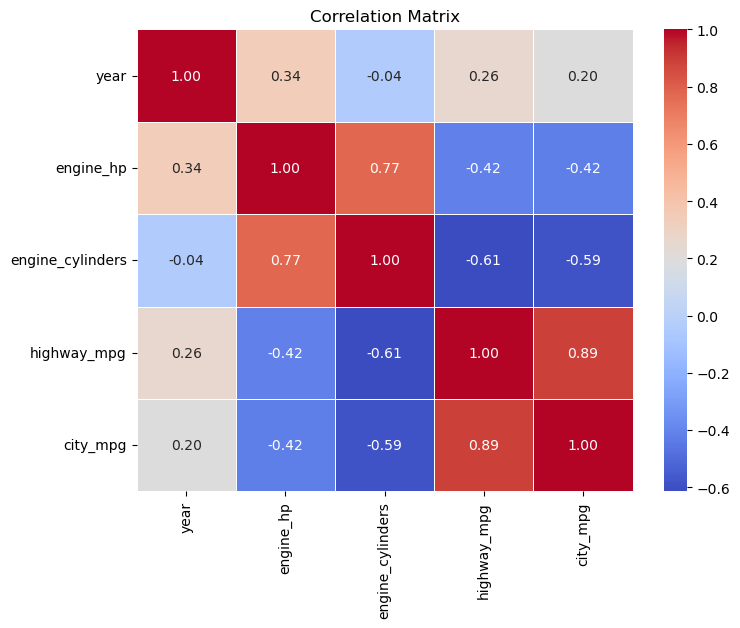

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Make price binary

mean_price = df['price'].mean()
df['above_average'] = (df['price'] > mean_price).astype(int)
df['above_average']

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: above_average, Length: 11914, dtype: int64

In [15]:
# Split the data
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)


In [16]:
# Make sure that the target value (price) is not in your dataframe.
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['price']
del df_val['price']

In [17]:
df_train_full.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
above_average        0
dtype: int64

In [18]:
df_train_full.above_average.value_counts()

above_average
0    6893
1    2638
Name: count, dtype: int64

In [19]:
global_mean = df_train_full.above_average.mean()
round(global_mean, 3)

0.277

In [20]:
df_train_full.transmission_type.unique()

array(['automatic', 'manual', 'automated_manual', 'unknown',
       'direct_drive'], dtype=object)

# Calculating the ratio (risk)
The ratio can provide insights into how much the <b>probability of being above average</b> for that transmission type differs from the overall probability.

If the ratio is <b>greater than 1</b>, it means cars with that transmission type <b>are more likely to be above average</b> compared to the overall average.

If the ratio is <b>less than 1</b>, it means cars with that transmission type <b>are less likely to be above average</b> compared to the overall average.

In [21]:
df_train_full[categorical].nunique()

make                  48
model                902
transmission_type      5
vehicle_style         16
dtype: int64

In [22]:
# calculating and comparing the transmission type ratio with overall ratio

global_mean = df_train_full.above_average.mean()
print('above average global_mean ==', round(global_mean, 3))
print()

transmission_types = df_train_full.transmission_type.unique()

for trans_type in transmission_types:
    mean_value = df_train_full[df_train_full.transmission_type == trans_type].above_average.mean()
    print(f'transmission_type == {trans_type}: {mean_value:.3f}')
    print(f'transmission_type_ratio: {mean_value/global_mean:.3f}')
    print()

above average global_mean == 0.277

transmission_type == automatic: 0.310
transmission_type_ratio: 1.120

transmission_type == manual: 0.139
transmission_type_ratio: 0.501

transmission_type == automated_manual: 0.474
transmission_type_ratio: 1.713

transmission_type == unknown: 0.000
transmission_type_ratio: 0.000

transmission_type == direct_drive: 0.458
transmission_type_ratio: 1.656



In [23]:
# Calculating the risk of a specific transmission type to be above average (risk = ratio)

df_group = df_train_full.groupby(by='transmission_type').above_average.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
transmission_type,,,
automated_manual,0.474206,0.197425,1.713291
automatic,0.310017,0.033236,1.120079
direct_drive,0.458333,0.181552,1.655942
manual,0.138652,-0.138129,0.500944
unknown,0.000000,-0.276781,0.000000


In [24]:
# calculating the risk for all categorical features

for col in categorical:
    df_group = df_train_full.groupby(by=col).above_average.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

# categorical


,mean,diff,risk
make,,,
acura,0.391089,0.114308,1.412991
alfa_romeo,1.000000,0.723219,3.612964
aston_martin,1.000000,0.723219,3.612964
audi,0.654412,0.377631,2.364366
bentley,1.000000,0.723219,3.612964
bmw,0.822064,0.545283,2.970088
bugatti,1.000000,0.723219,3.612964
buick,0.123377,-0.153404,0.445755
cadillac,0.881988,0.605207,3.186590


,mean,diff,risk
model,,,
100,0.000000,-0.276781,0.000000
124_spider,0.000000,-0.276781,0.000000
190-class,0.000000,-0.276781,0.000000
1_series,0.416667,0.139886,1.505402
2,0.000000,-0.276781,0.000000
...,...,...,...
z3,0.000000,-0.276781,0.000000
z4,1.000000,0.723219,3.612964
z4_m,1.000000,0.723219,3.612964


,mean,diff,risk
transmission_type,,,
automated_manual,0.474206,0.197425,1.713291
automatic,0.310017,0.033236,1.120079
direct_drive,0.458333,0.181552,1.655942
manual,0.138652,-0.138129,0.500944
unknown,0.000000,-0.276781,0.000000


,mean,diff,risk
vehicle_style,,,
2dr_hatchback,0.000000,-0.276781,0.000000
2dr_suv,0.035398,-0.241383,0.127893
4dr_hatchback,0.046099,-0.230682,0.166555
4dr_suv,0.374619,0.097838,1.353486
cargo_minivan,0.000000,-0.276781,0.000000
cargo_van,0.000000,-0.276781,0.000000
convertible,0.555380,0.278599,2.006567
convertible_suv,0.153846,-0.122935,0.555841
coupe,0.496257,0.219476,1.792958


# Question 3: Feature with the lowest mutual information score

In [25]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.above_average)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

display(df_mi)

,MI
model,0.460994
make,0.238724
vehicle_style,0.083390
transmission_type,0.020884


In [26]:
df_train_full[numerical].corrwith(df_train_full.above_average).to_frame('correlation')

,correlation
year,0.318753
engine_hp,0.660670
engine_cylinders,0.453162
highway_mpg,-0.134484
city_mpg,-0.157912


In [27]:
df_train_full.groupby(by='above_average')[numerical].mean()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
above_average,,,,,
0,2008.926882,202.652981,5.107355,27.363412,20.522124
1,2014.300986,365.903336,6.927976,24.734268,17.524261


## One-hot encoding

In [28]:
from sklearn.feature_extraction import DictVectorizer

train_dict = df_train[categorical+ numerical].to_dict(orient='records')

train_dict[0]

{'make': 'mitsubishi',
 'model': 'endeavor',
 'transmission_type': 'automatic',
 'vehicle_style': '4dr_suv',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'highway_mpg': 19,
 'city_mpg': 15}

In [29]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [30]:
X_train = dv.transform(train_dict)
X_train.shape

(7148, 943)

In [31]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=acura', 'make=alfa_romeo', 'make=aston_martin', 'make=audi',
       'make=bentley', 'make=bmw', 'make=bugatti', 'make=buick',
       'make=cadillac', 'make=chevrolet', 'make=chrysler', 'make=dodge',
       'make=ferrari', 'make=fiat', 'make=ford', 'make=genesis',
       'make=gmc', 'make=honda', 'make=hummer', 'make=hyundai',
       'make=infiniti', 'make=kia', 'make=lamborghini', 'make=land_rover',
       'make=lexus', 'make=lincoln', 'make=lotus', 'make=maserati',
       'make=maybach', 'make=mazda', 'make=mclaren', 'make=mercedes-benz',
       'make=mitsubishi', 'make=nissan', 'make=oldsmobile',
       'make=plymouth', 'make=pontiac', 'make=porsche',
       'make=rolls-royce', 'make=saab', 'make=scion', 'make=spyker',
       'make=subaru', 'make=suzuki', 'make=tesla', 'make=toyota',
       'make=volkswagen', 'make=volvo', 'model=100', 'model=124_spider',
       'model=190-class', 'model=1_series', 'model

# Question 4 | Let's train a logistic regression.

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [34]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [46]:
np.set_printoptions(suppress=True)
model.predict_proba(X_val)

array([[0.995428  , 0.004572  ],
       [0.00757759, 0.99242241],
       [0.99874497, 0.00125503],
       ...,
       [0.99936471, 0.00063529],
       [0.036337  , 0.963663  ],
       [0.03609818, 0.96390182]])

In [48]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.004572  , 0.99242241, 0.00125503, ..., 0.00063529, 0.963663  ,
       0.96390182])

In [49]:
above_average = y_pred > 0.5

In [51]:
(y_val == above_average).mean()

0.9387326898866974

# Model interpretation

In [52]:
model.intercept_[0]

-0.09947066871642177

In [53]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'city_mpg': 0.019,
 'engine_cylinders': -0.079,
 'engine_hp': 0.034,
 'highway_mpg': 0.08,
 'make=acura': 1.006,
 'make=alfa_romeo': 0.684,
 'make=aston_martin': 0.252,
 'make=audi': 2.342,
 'make=bentley': 0.088,
 'make=bmw': 2.0,
 'make=bugatti': 0.0,
 'make=buick': -0.438,
 'make=cadillac': 1.97,
 'make=chevrolet': -1.371,
 'make=chrysler': -1.27,
 'make=dodge': -2.913,
 'make=ferrari': 0.15,
 'make=fiat': -0.216,
 'make=ford': -1.401,
 'make=genesis': 0.192,
 'make=gmc': -0.737,
 'make=honda': -1.21,
 'make=hummer': -0.009,
 'make=hyundai': -2.117,
 'make=infiniti': 0.146,
 'make=kia': -1.478,
 'make=lamborghini': 0.004,
 'make=land_rover': 1.855,
 'make=lexus': 1.157,
 'make=lincoln': 1.08,
 'make=lotus': 2.432,
 'make=maserati': 0.449,
 'make=maybach': 0.002,
 'make=mazda': -1.146,
 'make=mclaren': 0.0,
 'make=mercedes-benz': 1.166,
 'make=mitsubishi': -1.002,
 'make=nissan': -0.888,
 'make=oldsmobile': -0.627,
 'make=plymouth': -0.05,
 'make=pontiac': -1.718,
 'make=porsche': 1